###**Evolución del número de hijos por mujer en España por provincias desde 1975**
Cogemos los datos que nos proporciona el INE a través de los [Indicadores de Fecundidad](https://www.ine.es/jaxiT3/Tabla.htm?t=1478&L=0), con ello representaremos un GIF con la evolución temporal del número medio de hijos por mujer desde el año 1975 al año 2020 en las provincias españolas.

Para seleccionar los datos que se utilizan en el ejemplo, seleccionamos: 
- En Provincias seleccionamos todas menos Total Nacional
- En Orden de nacimiento seleccionamos Todos
- En Periodo seleccionamos todos los años disponibles

En el cuaderno [*Como dibujar mapas en Python II Mapas dinámicos*](https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Esquemas_Python/C%C3%B3mo%20dibujar%20mapas%20en%20Python%20II%20Mapas%20din%C3%A1micos.ipynb) viene detallado como representar un GIF.


In [ ]:
# Cargamos la librerias que vamos a utilizar
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import io

Seleccionamos el archivo de datos descargado anteriormente, al que hemos llamado ***MediaHijos***, que se trata de un archivo csv separado por ;

In [ ]:
from google.colab import files
uploaded = files.upload()
datos=pd.read_csv("MediaHijos.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")

datos["Codigo"] = datos["Provincias"].str[:2]
datos = datos[["Codigo", "Provincias", "Periodo", "Total"]]
datos.head()

Saving MediaHijos.csv to MediaHijos.csv


Codigo   Provincias  Periodo  Total
0     02  02 Albacete     2020   1.21
1     02  02 Albacete     2019   1.23
2     02  02 Albacete     2018   1.28
3     02  02 Albacete     2017   1.32
4     02  02 Albacete     2016   1.34

In [ ]:
# Importamos datos geográficos que actualmente se encuentran en nuestro repositorio de GitHub
canarias = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/canarias_provincias.zip?raw=true')
peninsula_baleares = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/peninsula_provincias.zip?raw=true')

Canarias_Acercadas = canarias
from shapely import affinity
Canarias_Acercadas["geometry"] = Canarias_Acercadas["geometry"].apply(affinity.translate, xoff=4.5, yoff=7) #Con la función apply() aplicamos la función affinit

# Unimos los datos cartograficos
mapa = gpd.GeoDataFrame(pd.concat([peninsula_baleares, Canarias_Acercadas]))
mapa.head()

INSPIREID COUNTRY  \
0  ES.IGN.BDDAE.34084500000      ES   
1  ES.IGN.BDDAE.34024400000      ES   
2  ES.IGN.BDDAE.34094300000      ES   
3  ES.IGN.BDDAE.34074200000      ES   
4  ES.IGN.BDDAE.34014100000      ES   

                                              NATLEV NATLEVNAME      NATCODE  \
0  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34084500000   
1  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34024400000   
2  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34094300000   
3  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34074200000   
4  https://inspire.ec.europa.eu/codelist/Administ...  Provincia  34014100000   

    NAMEUNIT CODNUT1 CODNUT2 CODNUT3  \
0     Toledo     ES4    ES42    None   
1     Teruel     ES2    ES24    None   
2  Tarragona     ES5    ES51    None   
3      Soria     ES4    ES41    None   
4    Sevilla     ES6    ES61    None   

                                            geometry  
0  POLYGON ((-5.40611 39.87773, -5.40618 39.87884...  
1  POLYGON ((0.14136 40.71821, 0.12382 40.72081, ...  
2  MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6...  
3  POLYGON ((-1.99369 41.57709, -1.99311 41.57646...  
4  POLYGON ((-5.94134 36.85192, -5.94659 36.85232...

In [ ]:
# Creamos una nueva columna que después añadiremos a nuestro DataFrame
mapa["Codigo"] = mapa["NATCODE"].str[4:6] # Para quedarnos con el código de la provincia
mapa[["NAMEUNIT", "NATCODE", "Codigo"]].head()

NAMEUNIT      NATCODE Codigo
0     Toledo  34084500000     45
1     Teruel  34024400000     44
2  Tarragona  34094300000     43
3      Soria  34074200000     42
4    Sevilla  34014100000     41

In [ ]:
# Creamos una columna para cada Periodo
datos_evolucion = datos.pivot_table('Total', ['Codigo', 'Provincias'], 'Periodo')
datos_evolucion.reset_index( drop=False, inplace=True)

# Nos quedamos con las columnas más relevantes del dataframe con información geográfica
mapa_evolucion = mapa[["Codigo", "geometry"]] 
mapa_evolucion = pd.merge(mapa_evolucion, datos_evolucion) # Realizamos la unión, que se hará en base a las columnas Codigo
mapa_evolucion.head()

Codigo                                           geometry    Provincias  \
0     45  POLYGON ((-5.40611 39.87773, -5.40618 39.87884...     45 Toledo   
1     44  POLYGON ((0.14136 40.71821, 0.12382 40.72081, ...     44 Teruel   
2     43  MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6...  43 Tarragona   
3     42  POLYGON ((-1.99369 41.57709, -1.99311 41.57646...      42 Soria   
4     41  POLYGON ((-5.94134 36.85192, -5.94659 36.85232...    41 Sevilla   

   1975  1976  1977  1978  1979  1980  1981  ...  2011  2012  2013  2014  \
0  2.56  2.66  2.52  2.57  2.43  2.40  2.35  ...  1.44  1.41  1.34  1.35   
1  1.98  2.04  2.12  2.11  2.17  2.07  1.95  ...  1.36  1.33  1.35  1.38   
2  2.78  2.90  2.80  2.69  2.41  2.24  2.01  ...  1.48  1.44  1.37  1.42   
3  1.84  2.00  2.04  1.96  1.91  1.79  1.80  ...  1.21  1.25  1.21  1.20   
4  3.24  3.30  3.27  3.18  2.93  2.84  2.61  ...  1.46  1.42  1.38  1.43   

   2015  2016  2017  2018  2019  2020  
0  1.37  1.38  1.38  1.34  1.29  1.30  
1  1.26  1.40  1.27  1.31  1.37  1.31  
2  1.45  1.43  1.42  1.37  1.38  1.30  
3  1.23  1.25  1.21  1.27  1.23  1.27  
4  1.42  1.43  1.38  1.35  1.30  1.27  

[5 rows x 49 columns]

Creamos un bucle que va a iterar unas 45 veces, por lo que es un proceso que va a tardar unos 5 min en completarse. 

In [ ]:
# Creamos la lista de fotogramas vacía:
fotogramas = []

# Creamos el bucle for que pasará por todos los elementos de la lista de columna empezando por el cuarto:
for fechas in mapa_evolucion.columns.to_list()[3:]:

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.axis([-15, 5, 34, 45]) 
 
    # Título y ejes:
    ax.set_title("Media de hijos por mujer en " + str(fechas), 
                  pad = 20, 
                  fontdict={"fontsize":25}) 
    ax.set_xlabel("Longitud", fontsize=20)
    plt.xticks(fontsize=15)
    ax.set_ylabel("Latitud", fontsize=20)
    plt.yticks(fontsize=15)
    plt.grid(True, zorder=0)

    # Eliminar ejes
    ax.set_axis_off()

    # Leyenda
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="5%",
                              pad=0.1) # Para separar la leyenda un poco del mapa

    # Dibujamos nuestro mapa de provincias:
    mapa_evolucion.plot(ax=ax,
               column=fechas,
               cmap="Reds", # Seleccionamos un Colormaps acorde a lo que queremos representar
               edgecolor="black",
               linewidth=0.2,
               legend=True,
               # Indicamos el número mínimo y máximo de nuestra leyenda acorde a los datos que tenemos
               norm=plt.Normalize(vmin=0, vmax=3.5), 
               cax=cax,
               zorder=5); 

    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);
 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
    mapa_paises.plot(ax=ax,
                   color="palegoldenrod",
                   edgecolor="black",
                   linewidth=0.2,
                   zorder=2); 
  
    # Creamos el GIF
    f = io.BytesIO() # Creamos un objeto que va a contener elementos binarios 
    imagen = ax.get_figure() # Vamos "capturando", uno a uno, los mapas que vamos creando
    imagen.savefig(f, # Guadamos la información de cada mapa
                   format="png", # Formato
                   bbox_inches="tight") 
    f.seek(0) 
    fotogramas.append(PIL.Image.open(f)) # Con append() vamos añadiendo cada mapa a la lista de fotogramas.


fotogramas[0].save("Mapa evolución de la media de hijos por mujer por provincias.gif", 
                   format="GIF", 
                   append_images = fotogramas[1:], 
                   save_all = True,
                   duration = 1200, # Duración en milisegundos del GIF
                   loop=0) # Para que vuelva a mepezar el GIF

f.close() # Cerramos el archivo binario 

# Se mostraran todos los archivos png que hemos utilizado para formar el GIF, 
# como no los necesitamos, pulsamos en la parte izquierda y borramos los resultados mostrados (x)

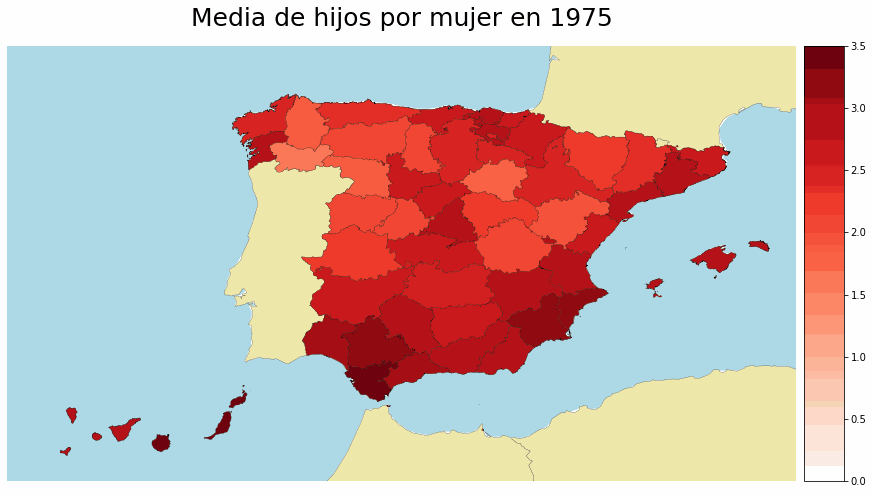

In [ ]:
# Leemos el GIF previamente guardado
from IPython.display import Image
from matplotlib import animation
Image(open("/content/Mapa evolución de la media de hijos por mujer por provincias.gif", "rb").read()) 

In [ ]:
# Descargamos el GIF
from google.colab import files
files.download("Mapa evolución de la media de hijos por mujer por provincias.gif") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>